In [2]:
import pandas as pd

df = pd.read_csv("data/retention_dataset.csv")
df.head() 

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.386852,...,25,Comedy,3.489465,7,Female,15,No,No,LOHRYYC9E8,0
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,37.123000,...,21,Comedy,2.251860,3,Male,8,No,NaN,RIH7RFEZCS,0
2,6,NaN,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,30.716944,...,29,Fantasy,NaN,4,Male,14,No,Yes,JB5J8X2UY1,1
3,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,2.495373,...,45,Drama,1.275004,3,Male,12,No,NaN,Z4GZJIB90P,0
4,27,NaN,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,39.936910,...,44,Comedy,3.236230,4,Female,18,No,NaN,B3BDJTW0L9,0


### Data Description

In [49]:
df.columns 

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn', 'Retention'],
      dtype='object')

This dataset includes a binary variable, Churn, indicating whether a customer discontinued their subscription during the observed period. For this analysis, we define Customer Retention as the inverse of Churn, where a retained customer is one who did not discontinue the service. 

In [7]:
df["Retention"] = 1 - df["Churn"]
df[["Churn", "Retention"]].head() 

,Churn,Retention
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


The dataset encodes churn as a binary numeric variable, where a value of 1 indicates customer attrition and 0 indicates continued service. To align the analysis with a retention-focused framing, a new binary variable, Retention, was created as the inverse of churn. 

In [8]:
df["Retention"].value_counts(normalize=True) 

Retention
1    0.824507
0    0.175493
Name: proportion, dtype: float64

Approximately 82% of customers in the dataset are retained, while 18% discontinue service. This indicates moderate class imbalance, suggesting that accuracy alone may be insufficient for evaluating model performance. 

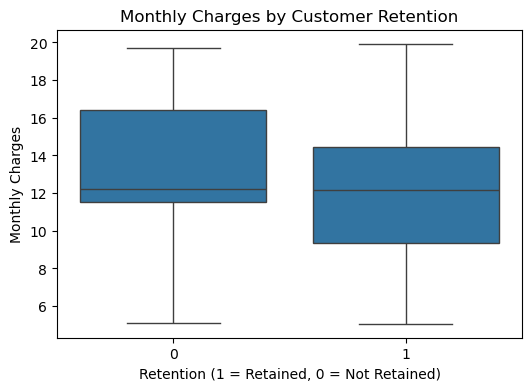

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x="Retention", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Customer Retention")
plt.xlabel("Retention (1 = Retained, 0 = Not Retained)")
plt.ylabel("Monthly Charges")

plt.savefig(
    "results/figures/monthly_charges_retention.png",
    bbox_inches="tight",
    dpi=300
)
plt.show() 

Customers who are not retained tend to exhibit higher monthly charges compared to retained customers. While there is substantial overlap between the two groups, the distribution suggests that higher recurring costs may be associated with lower retention. 

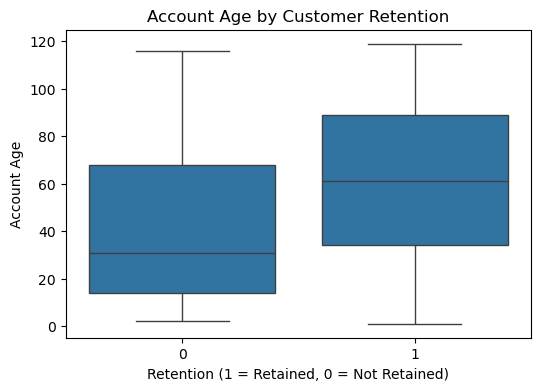

In [54]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Retention", y="AccountAge", data=df)
plt.title("Account Age by Customer Retention")
plt.xlabel("Retention (1 = Retained, 0 = Not Retained)")
plt.ylabel("Account Age")

plt.savefig(
    "results/figures/account_age_retention.png",
    bbox_inches="tight",
    dpi=300
)
plt.show() 

Retained customers tend to have substantially longer account tenures than non-retained customers. This indicates that customer longevity is strongly associated with retention, consistent with expectations in subscription-based services. 

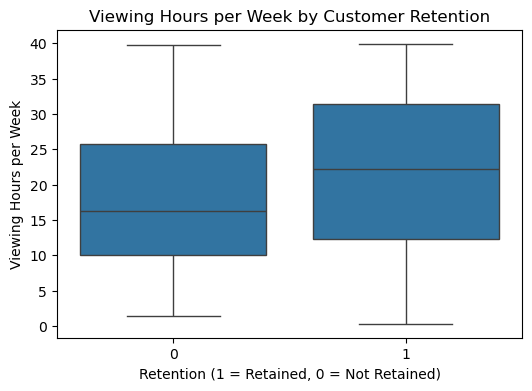

In [55]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Retention", y="ViewingHoursPerWeek", data=df)
plt.title("Viewing Hours per Week by Customer Retention")
plt.xlabel("Retention (1 = Retained, 0 = Not Retained)")
plt.ylabel("Viewing Hours per Week")

plt.savefig(
    "results/figures/viewing_hours_retention.png",
    bbox_inches="tight",
    dpi=300
)
plt.show() 

Retained customers tend to exhibit higher weekly viewing hours compared to non-retained customers. This suggests that customer engagement may be positively associated with retention, although substantial overlap between groups indicates that engagement alone is not sufficient to fully explain retention behavior. 

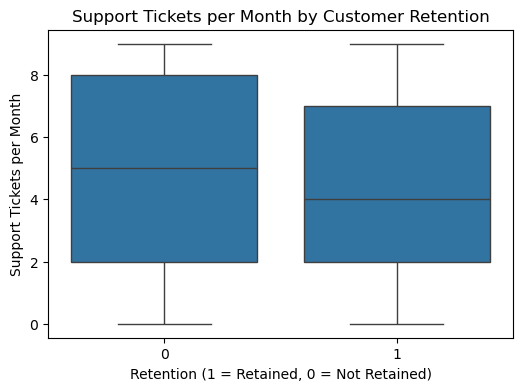

In [56]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Retention", y="SupportTicketsPerMonth", data=df)
plt.title("Support Tickets per Month by Customer Retention")
plt.xlabel("Retention (1 = Retained, 0 = Not Retained)")
plt.ylabel("Support Tickets per Month")

plt.savefig(
    "results/figures/support_tickets_retention.png",
    bbox_inches="tight",
    dpi=300
)
plt.show()  

Non-retained customers exhibit a marginally higher number of support tickets per month compared to retained customers. While the difference is less pronounced than for engagement or tenure, this pattern suggests that service-related issues may contribute to customer attrition. 

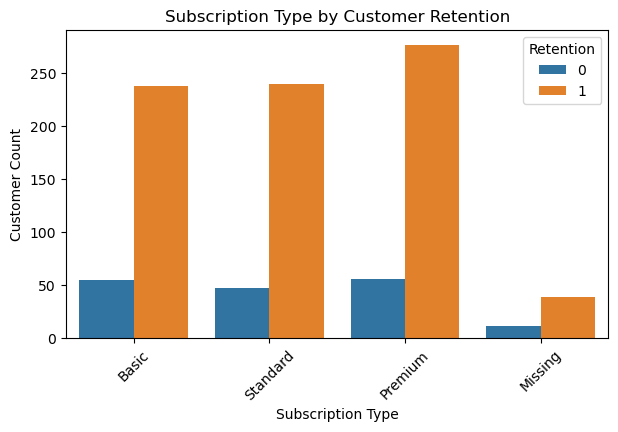

In [57]:
plt.figure(figsize=(7, 4))
sns.countplot(x="SubscriptionType", hue="Retention", data=df)
plt.title("Subscription Type by Customer Retention")
plt.xlabel("Subscription Type")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)

plt.savefig(
    "results/figures/subscription_type_retention.png",
    bbox_inches="tight",
    dpi=300
)
plt.show() 

Retention rates appear broadly similar across subscription tiers, with no single plan type exhibiting substantially higher or lower retention. This suggests that subscription tier alone may not be a primary driver of retention, and that other factors such as engagement, tenure, and service experience may play a more significant role. 

### Data Processing

In [59]:
df.isna().sum().sort_values(ascending=False) 

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
Retention                   0
dtype: int64

In [60]:
# separate feautres
binary_cols = [
    "PaperlessBilling", "MultiDeviceAccess",
    "ParentalControl", "SubtitlesEnabled"
]

numeric_cols = [
    "AccountAge", "MonthlyCharges", "TotalCharges",
    "ViewingHoursPerWeek", "AverageViewingDuration",
    "ContentDownloadsPerMonth", "UserRating",
    "WatchlistSize", "SupportTicketsPerMonth"
]

categorical_cols = [
    "SubscriptionType", "PaymentMethod", "ContentType",
    "GenrePreference", "DeviceRegistered", "Gender"
] 

In [61]:
# Impute numeric columns 
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median()) 

In [62]:
# Impute Binary columns 
for col in binary_cols:
    df[col] = df[col].fillna(df[col].mode()[0]) 

In [63]:
# Impute categorical columns 
for col in categorical_cols:
    df[col] = df[col].fillna("Missing") 

In [64]:
df.isna().sum().sort_values(ascending=False) 

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
Retention                   0
dtype: int64

Missing values were handled using feature-specific strategies. Numeric variables were imputed using median values to reduce sensitivity to skewed distributions, binary variables were imputed using the most frequent category, and categorical variables were assigned a distinct “Missing” category to preserve information related to missingness. 

### Modeling Approach

In [65]:
# separate x and y 
X = df.drop(columns=["Retention", "Churn"])
y = df["Retention"] 

In [66]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
) 

In [67]:
X_encoded.head() 

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Missing,GenrePreference_Sci-Fi,DeviceRegistered_Missing,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,Gender_Male,Gender_Missing
0,42,11.321950,475.521914,Yes,Yes,0.386852,24.593361,25,3.489465,7,...,False,False,False,False,False,False,False,True,False,False
1,95,12.810915,1217.036887,Yes,No,37.123000,102.860795,21,2.251860,3,...,False,False,False,False,False,True,False,False,True,False
2,6,12.169888,91.583304,Yes,No,30.716944,10.512415,29,2.898328,4,...,False,True,False,False,False,False,False,True,True,False
3,54,17.917819,967.562224,Yes,No,2.495373,45.246834,45,1.275004,3,...,True,False,False,False,False,True,False,False,True,False
4,27,12.169888,339.057244,No,No,39.936910,94.310954,44,3.236230,4,...,False,False,False,False,False,True,False,False,False,False


In [68]:
# scale numeric features 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols]) 

In [69]:
# split the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
) 

In [70]:
X_train.shape, X_test.shape 

((722, 34), (241, 34))

In [71]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True) 

(Retention
 1    0.8241
 0    0.1759
 Name: proportion, dtype: float64,
 Retention
 1    0.825726
 0    0.174274
 Name: proportion, dtype: float64)

Categorical variables were encoded using one-hot encoding, while numeric features were standardized to ensure comparable scales for model training. The dataset was then split into training and testing sets using stratified sampling to preserve the original class distribution. 

## Model 1: Logistic Regression

In [72]:
binary_map = {"Yes": 1, "No": 0}

for col in binary_cols:
    X_encoded[col] = X_encoded[col].map(binary_map) 

In [73]:
X_encoded.dtypes 

AccountAge                        float64
MonthlyCharges                    float64
TotalCharges                      float64
PaperlessBilling                    int64
MultiDeviceAccess                   int64
ViewingHoursPerWeek               float64
AverageViewingDuration            float64
ContentDownloadsPerMonth          float64
UserRating                        float64
SupportTicketsPerMonth            float64
WatchlistSize                     float64
ParentalControl                     int64
SubtitlesEnabled                    int64
CustomerID                         object
SubscriptionType_Missing             bool
SubscriptionType_Premium             bool
SubscriptionType_Standard            bool
PaymentMethod_Credit card            bool
PaymentMethod_Electronic check       bool
PaymentMethod_Mailed check           bool
PaymentMethod_Missing                bool
ContentType_Movies                   bool
ContentType_TV Shows                 bool
GenrePreference_Comedy            

In [74]:
X_encoded = X_encoded.drop(columns=["CustomerID"]) 

In [75]:
X_encoded.dtypes 

AccountAge                        float64
MonthlyCharges                    float64
TotalCharges                      float64
PaperlessBilling                    int64
MultiDeviceAccess                   int64
ViewingHoursPerWeek               float64
AverageViewingDuration            float64
ContentDownloadsPerMonth          float64
UserRating                        float64
SupportTicketsPerMonth            float64
WatchlistSize                     float64
ParentalControl                     int64
SubtitlesEnabled                    int64
SubscriptionType_Missing             bool
SubscriptionType_Premium             bool
SubscriptionType_Standard            bool
PaymentMethod_Credit card            bool
PaymentMethod_Electronic check       bool
PaymentMethod_Mailed check           bool
PaymentMethod_Missing                bool
ContentType_Movies                   bool
ContentType_TV Shows                 bool
GenrePreference_Comedy               bool
GenrePreference_Drama             

In [76]:
# redo the split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
) 

In [77]:
# Train Logistic regression 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train) 

LogisticRegression(max_iter=1000)

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

accuracy_score(y_test, y_pred_lr), \
precision_score(y_test, y_pred_lr), \
recall_score(y_test, y_pred_lr), \
roc_auc_score(y_test, y_prob_lr) 

(0.8381742738589212,
 0.8603603603603603,
 0.9597989949748744,
 np.float64(0.7445561139028476))

A logistic regression model was used as a baseline classifier. The model achieved an accuracy of 83.8% and an ROC–AUC of 0.745, indicating meaningful discriminatory ability beyond a naïve baseline. Recall for retained customers was high (96%), suggesting the model effectively identifies customers likely to remain subscribed, though precision and AUC indicate potential for improvement using more flexible models.

In [79]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coef_df.head(5), coef_df.tail(5) 

(                    Feature  Coefficient
 32           Gender_Missing     0.852064
 0                AccountAge     0.656165
 30  DeviceRegistered_Tablet     0.422851
 5       ViewingHoursPerWeek     0.396075
 6    AverageViewingDuration     0.395886,
                        Feature  Coefficient
 13    SubscriptionType_Missing    -0.319791
 1               MonthlyCharges    -0.453069
 20          ContentType_Movies    -0.473171
 21        ContentType_TV Shows    -0.580642
 18  PaymentMethod_Mailed check    -0.611336)

In [81]:
from sklearn.metrics import roc_curve, auc 

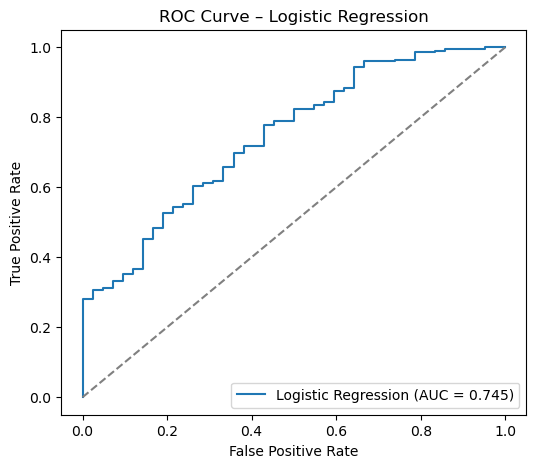

In [82]:
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend(loc="lower right")

plt.savefig(
    "results/figures/roc_curve_logistic_regression.png",
    bbox_inches="tight",
    dpi=300
)
plt.show() 

Coefficient estimates from the logistic regression model indicate that customer tenure and engagement metrics are positively associated with retention, while higher monthly charges and certain payment methods are associated with lower retention. Notably, missing demographic information also exhibits a strong positive association with retention, suggesting that missingness itself may capture meaningful customer characteristics rather than random noise.

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)
dt.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=5, random_state=42)

In [40]:
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt)) 

Accuracy: 0.7634854771784232
Precision: 0.8349056603773585
Recall: 0.8894472361809045
ROC-AUC: 0.576214405360134


A decision tree classifier was evaluated to capture potential non-linear relationships. However, the model underperformed relative to logistic regression, achieving a lower ROC–AUC of 0.576. This suggests that linear relationships between features and retention dominate in this dataset, and that increased model complexity does not necessarily yield improved predictive performance. 

## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=200, random_state=42)

In [42]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf)) 

Accuracy: 0.8298755186721992
Precision: 0.8347457627118644
Recall: 0.9899497487437185
ROC-AUC: 0.6877841588896866


## Model Comparison

In [43]:
# Comparison table 
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [0.838, 0.763, 0.830],
    "Precision": [0.860, 0.835, 0.835],
    "Recall": [0.960, 0.889, 0.990],
    "ROC-AUC": [0.745, 0.576, 0.688]
})

results 

,Model,Accuracy,Precision,Recall,ROC-AUC
0,Logistic Regression,0.838,0.860,0.960,0.745
1,Decision Tree,0.763,0.835,0.889,0.576
2,Random Forest,0.830,0.835,0.990,0.688


Three supervised learning models were evaluated to predict customer retention: logistic regression, decision tree, and random forest. Logistic regression achieved the highest ROC–AUC (0.745), indicating superior discriminatory ability relative to more complex models. While the random forest exhibited extremely high recall, it did not improve overall classification performance. These results suggest that customer retention in this dataset is driven primarily by linear relationships between features and the outcome, making logistic regression the most appropriate model for this task. 

In [44]:
# Feature Imprtance from Randon Forest 
importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importances.head(10) 

,Feature,Importance
0,AccountAge,0.107856
6,AverageViewingDuration,0.098283
1,MonthlyCharges,0.089018
5,ViewingHoursPerWeek,0.088043
2,TotalCharges,0.086663
7,ContentDownloadsPerMonth,0.078965
8,UserRating,0.066731
10,WatchlistSize,0.059825
9,SupportTicketsPerMonth,0.057163
3,PaperlessBilling,0.016124


In [45]:
results_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf)
    ],
    "ROC_AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_dt),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

results_df 

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Logistic Regression,0.838174,0.860360,0.959799,0.744556
1,Decision Tree,0.763485,0.834906,0.889447,0.576214
2,Random Forest,0.829876,0.834746,0.989950,0.687784


In [46]:
results_df.sort_values(by="ROC_AUC", ascending=False) 

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Logistic Regression,0.838174,0.860360,0.959799,0.744556
2,Random Forest,0.829876,0.834746,0.989950,0.687784
1,Decision Tree,0.763485,0.834906,0.889447,0.576214


In [47]:
results_df.to_csv("model_performance_summary.csv", index=False) 

Table summarizes the performance of all evaluated models across multiple metrics. Logistic regression achieved the highest ROC–AUC, indicating superior discrimination between retained and non-retained customers.

### Model Validation

In [48]:
# Cross validation 
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg = LogisticRegression(max_iter=1000)

cv_auc_scores = cross_val_score(
    log_reg,
    X_encoded,
    y,
    cv=cv,
    scoring="roc_auc"
)

cv_auc_scores, cv_auc_scores.mean(), cv_auc_scores.std() 

(array([0.66241213, 0.74528302, 0.78005919, 0.73337145, 0.73026806]),
 np.float64(0.7302787707928269),
 np.float64(0.03825875853975257))

To assess the stability of the selected model, logistic regression was evaluated using 5-fold stratified cross-validation. Stratification was used to preserve the class distribution across folds. The cross-validated ROC–AUC was consistent with the hold-out test results, suggesting that model performance is not driven by a particular train–test split and generalizes reliably across the dataset.

In [50]:
df.to_csv("data/processed/retention_model_ready.csv", index=False) 

### Key Findings
1. Customer retention is strongly associated with tenure and engagement
Customers with longer account histories and higher engagement levels (e.g., viewing hours and viewing duration) are substantially more likely to remain subscribed. Both exploratory analysis and model coefficients consistently highlight tenure and engagement as the most influential predictors of retention.

2. Pricing and operational factors matter, but play a secondary role
Higher monthly charges and certain payment methods are associated with lower retention, suggesting that pricing friction and billing experience may contribute to customer attrition. However, these factors appear less influential than tenure and usage behavior when considered jointly in multivariate models.

3. Simpler models can outperform more complex ones
Among the evaluated models, logistic regression achieved the highest ROC–AUC, outperforming both decision tree and random forest classifiers. This indicates that retention behavior in this dataset is driven primarily by linear or additive relationships rather than complex non-linear interactions.

4. Model performance is stable across data partitions
Stratified cross-validation results were consistent with hold-out test performance, suggesting that the logistic regression model generalizes reliably and that observed results are not driven by a single train–test split. 

### Limitations
1. Observational data limits causal interpretation
The analysis relies on observational data, which prevents causal conclusions. While several variables are associated with retention, the results do not establish that these factors directly cause customers to stay or leave.

2. Class imbalance affects evaluation
The dataset exhibits moderate class imbalance, with retained customers representing the majority of observations. Although appropriate metrics were used, high recall values should be interpreted in the context of this imbalance.

3. Limited feature scope
The dataset does not include certain potentially important drivers of retention, such as:
- customer satisfaction surveys
- marketing exposure
- competitive alternatives
- customer service resolution outcomes
Inclusion of such features could improve predictive performance and interpretability.

4. Single dataset context
The model was trained and evaluated on a single subscription-based dataset. Results may not fully generalize to other industries or customer populations without further validation. 

### Future Work 
1. Incorporate additional behavioral and satisfaction data
Future analyses could include richer engagement signals (e.g., session-level behavior) or customer feedback data to better capture drivers of retention beyond usage frequency.

2. Explore alternative evaluation strategies
Future work could examine:
- cost-sensitive learning
- alternative decision thresholds
- precision–recall trade-offs
to better align predictions with specific business objectives.

3. Test model performance across multiple datasets
Applying the same modeling framework to additional subscription-based datasets would help assess the robustness and generalizability of the findings.

4. Extend toward decision support
Rather than focusing solely on prediction, future work could integrate the model into a decision-support framework, identifying high-risk customers and evaluating potential intervention strategies. 